In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine,reflect=True)


C:\Users\Frida\AppData\Local\Temp\ipykernel_13552\1192292664.py:7: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine,reflect=True)


In [14]:
# View all of the classes that automap found

Base.classes.keys()

['station', 'measurement']

In [10]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB

session= Session(engine)


# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.

recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date


('2017-08-23',)

Text(0, 0.5, 'Inches')

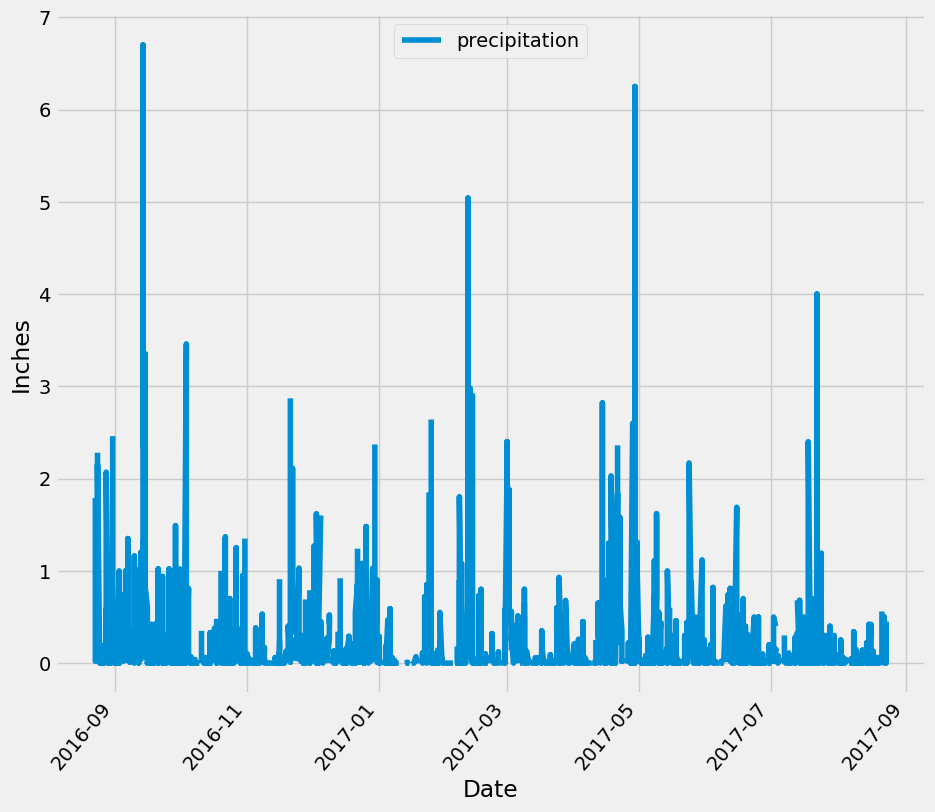

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date= dt.date(2017,8,23)


# Calculate the date one year from the last date in data set.
one_year=recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

query=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names

scores_df=pd.DataFrame(query).rename(columns={'prcp':'precipitation'})
scores_df['date']= pd.to_datetime(scores_df['date'], format = '%Y-%m-%d')
scores_df = scores_df.set_index('date')

# Sort the dataframe by date

sorted_scores_df=scores_df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data

sorted_scores_df.plot(figsize = (10,10), rot = 50)
plt.legend(loc = 'upper center')
plt.xlabel('Date')
plt.ylabel('Inches')


In [44]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_scores_df.describe()



,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [45]:
# Design a query to calculate the total number of stations in the dataset

session.query(func.count(Station.station)).all()

[(9,)]

In [47]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_station_list=[Measurement.station, func.count(Measurement.station)]

active_station= session.query(*active_station_list).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first().station

session.query(*active_station_list).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()




[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [53]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

temps_list=[func.min(Measurement.tobs),
            func.max(Measurement.tobs),
            func.avg(Measurement.tobs)]

query = session.query(*temps_list).group_by(Measurement.station).filter(Measurement.station == active_station).all()
query



[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 1.0, 'Tobs Frequency Distribution')

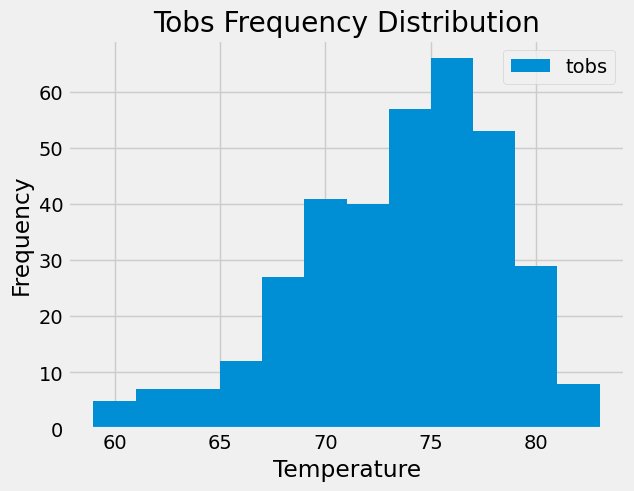

In [59]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_12_m = session.query(Measurement.date, Measurement.tobs).filter_by(station = "USC00519281").\
    filter(Measurement.date >= one_year).all()

last_12_df = pd.DataFrame(last_12_m)
last_12_df.plot(kind = "hist", bins = 12)
plt.xlabel('Temperature')
plt.title('Tobs Frequency Distribution')





# Close Session

In [60]:
# Close Session
session.close()